In [1]:
import qcodes as qc
import numpy as np
from time import sleep

import sweep 
from barreralabdrivers.utils.param_utils import paramp
from cappy.config import testconfig, datapath

In [ ]:
qc.Instrument.close_all()   # in case of existing connections

container = qc.Station(config_file=str(testconfig)) # testconfig stores the serial addresses of all devices 

dac = container.load_instrument("acdac") #turning our acdac into an instrument
li = container.load_instrument("lockin")
keithley = container.load_instrument("keithley")
yoko = container.load_instrument("yoko")

"""
to find new parameters from instrument once loaded, use
instrument_name.print_readable_snapshot()
"""

Connected to: BARRERA ACDAC02 (serial:AD9106, firmware:2.00) in 3.05s
Connected to: Stanford_Research_Systems SR865A (serial:005296, firmware:V1.51) in 0.08s
Connected to: KEITHLEY INSTRUMENTS DMM6500 (serial:04608216, firmware:1.7.12b) in 0.01s
Connected to: YOKOGAWA 765611 (serial:90ZC43353, firmware:1.10) in 0.02s


'\nto find new parameters from instrument once loaded, use\ninstrument_name.print_readable_snapshot()\n'

In [8]:
# parameter definitions 
vg = yoko.channel2.voltage
vg.label = "vg" 

vdd = yoko.channel1.voltage


vds = keithley.amplitude
vds.label="vds"

dep_params = [vds, li.R, li.P]

In [6]:
# Setup database
sweep.set_basedir(datapath) #initializing the measureme variable which will store the measured data
s = sweep.Station() #making a new station which stores parameters
s.reset() 

s.fp(vg) #adds parameter to station and database
for dep_parm in dep_params:
    s.fp(dep_parm)

s.add_comment("testing labelling")

Now going to set initial variables which won't be swept during measurement.

In [9]:
vdd(0.1) # setting vdd = 0.1V
dac.ch1.voltage(100) # setting dac ch1 = 100mV
dac.ch2.voltage(400) # setting dac ch2 = 400mV


# Run Experiment

In [10]:
START = 0 
STOP = -0.7
SAMPLES = 100
INT_TIME = 0.05

def setup():
    dac.frequency(10000)

    dac.ch4.voltage(400)
    dac.ch3.voltage(300)
    dac.display_mode("REMOTE")

    dac.ch1.voltage(100)
    dac.ch2.voltage(0)

    vg.instrument.output(1)

def teardown():
    paramp(vg)
    vg.instrument.output(0)

In [11]:
# run measurement
for dep_param in dep_params:
    s.plot(vg, dep_param)

2024-11-22 15:30:22,415 [INFO] Starting sweep with ID 24
2024-11-22 15:30:22,415 [INFO] Minimum duration 0h 0m 5s


  0%|          | 0/100 [00:00<?, ?it/s]

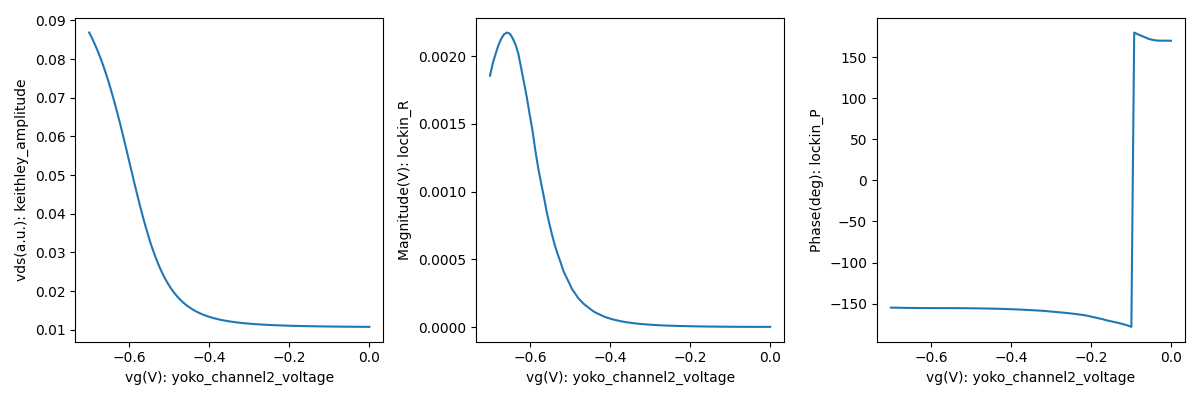

2024-11-22 15:30:32,899 [INFO] Completed in 0h 0m 10s
2024-11-22 15:30:32,899 [INFO] Data saved in C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data\24\data.tsv.gz


In [12]:
setup()
sleep(2)
res = s.sweep(vg, np.linspace(START, STOP, SAMPLES), delay=INT_TIME)
teardown()

In [13]:
print(res.metadata['columns'])
print(np.loadtxt(res.datapath))
paramp(vdd)

['time', 'vg(V): yoko_channel2_voltage', 'vg(V): yoko_channel2_voltage', 'vds(a.u.): keithley_amplitude', 'Magnitude(V): lockin_R', 'Phase(deg): lockin_P']
[[ 1.73230742e+09  0.00000000e+00  0.00000000e+00  1.07501000e-02
   2.16882518e-06  1.69917358e+02]
 [ 1.73230742e+09 -7.07070707e-03 -7.07000000e-03  1.07545600e-02
   2.17067463e-06  1.69979263e+02]
 [ 1.73230742e+09 -1.41414141e-02 -1.41400000e-02  1.07593700e-02
   2.16852732e-06  1.70001556e+02]
 [ 1.73230742e+09 -2.12121212e-02 -2.12100000e-02  1.07645000e-02
   2.16255830e-06  1.69994766e+02]
 [ 1.73230742e+09 -2.82828283e-02 -2.82800000e-02  1.07698900e-02
   2.15831346e-06  1.70023575e+02]
 [ 1.73230742e+09 -3.53535354e-02 -3.53500000e-02  1.07757300e-02
   2.16790727e-06  1.70215485e+02]
 [ 1.73230742e+09 -4.24242424e-02 -4.24200000e-02  1.07814500e-02
   2.19891763e-06  1.70651123e+02]
 [ 1.73230742e+09 -4.94949495e-02 -4.94900000e-02  1.07877100e-02
   2.25465374e-06  1.71370407e+02]
 [ 1.73230742e+09 -5.65656566e-02 -5